# Proyecto final 
## Joaquín Antonio Ramírez Hernández

Ejercicio 4

Aquí se carga la paquetería a utilizar

In [43]:
from scipy import stats
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt
from random import seed

In [50]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D

Aquí, se obtienen los datos que describen al cono 

$$(x-3)^{2}+(y-2)^{2}=(z+8)^{2}$$

para entrenar a la red neuronal con estos. Esta ecuación corresponde justamente al cono con vértice en (3,2,8).

Además, como se busca agregar al cono una translación de su vértice, por lo que, se agrega al arreglo de entrenamiento esa translación en los arreglos c,d,b.

Por último, es importante mencionar que nuestro modelo no considera rotaciones ni translaciones del cono.

In [51]:
x = np.linspace(-50,50,200)-3
y = np.linspace(-50,50,200)-2
z = np.zeros(200)
a=float()
b = np.zeros((200))+8
c = np.zeros((200))+3
d = np.zeros((200))+2
for i in range(200):
    a=x[i]**2+y[i]**2
    z[i]=math.sqrt(a)+b[i]
xy=np.array((x,y,c,d,b))
xy=np.transpose(xy)
xy.shape

(200, 5)

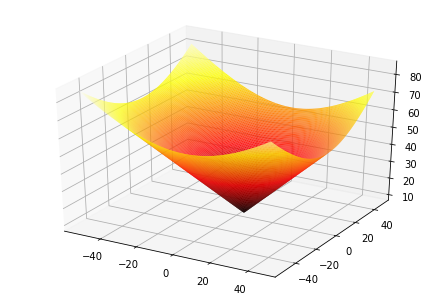

In [52]:
fig = plt.figure()
ax = Axes3D(fig)
x, y = np.meshgrid(x,y)
#z=np.sqrt(x**2 + y**2)
z=np.sqrt((x-3)**2+(y-2)**2)+b
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='hot')

In [53]:
x = np.linspace(-50,50,200)-3
y = np.linspace(-50,50,200)-2
z = np.zeros(200)
a=float()
b = np.zeros((200))+8
c = np.zeros((200))+3
d = np.zeros((200))+2
for i in range(200):
    a=x[i]**2+y[i]**2
    z[i]=math.sqrt(a)+b[i]
xy=np.array((x,y,c,d,b))
xy=np.transpose(xy)
xy.shape

(200, 5)

Se propone como red neuronal, a una red multicapa con 5 entradas, 50 neuronas como primer capa, 50 neuronas como segunda capa, 50 neuronas como tercer capa y una de salida, todas estas activadas por la función 'relu'. También, el entrenamiento se hace por medio del optimizador adam y con función de perdida 'mean_squared_error'. Como no encontré una métrica adecuada para el problema en este caso se omitió. Por último, se entrenó a la red neuronal con 1000 iteraciones y se hizo un muestreo de 30 datos a la vez, por contar con muchos datos.

In [54]:
model = Sequential()
model.add(Dense(units=50, activation='relu',input_dim=5))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xy,z,epochs=1000,batch_size=30)

Epoch 1/1000
7/7 [==============================] - 0s 1ms/step - loss: 2192.1728
Epoch 2/1000
7/7 [==============================] - 0s 1ms/step - loss: 1880.4379
Epoch 3/1000
7/7 [==============================] - 0s 1ms/step - loss: 1274.2438
Epoch 4/1000
7/7 [==============================] - 0s 816us/step - loss: 750.5176
Epoch 5/1000
7/7 [==============================] - 0s 898us/step - loss: 294.8495
Epoch 6/1000
7/7 [==============================] - 0s 1ms/step - loss: 72.2961
Epoch 7/1000
7/7 [==============================] - 0s 951us/step - loss: 36.2445
Epoch 8/1000
7/7 [==============================] - 0s 1ms/step - loss: 26.0928
Epoch 9/1000
7/7 [==============================] - 0s 1ms/step - loss: 8.3255
Epoch 10/1000
7/7 [==============================] - 0s 1ms/step - loss: 5.5370
Epoch 11/1000
7/7 [==============================] - 0s 1ms/step - loss: 5.2433
Epoch 12/1000
7/7 [==============================] - 0s 982us/step - loss: 1.9189
Epoch 13/1000
7/7 [======

Como podemos observar, la función perdida en la última iteración toma el valor $5.4491x10^{-05}$, lo cual, se interpreta como un error muy pequeño en el modelo obtenido

In [73]:
x = np.linspace(-300,300,200)-200
y = np.linspace(-200,200,200)+140
c=np.zeros(200)+200
d=np.zeros(200)-140
b=np.zeros(200)+100
xy=np.array((x,y,c,d,b))
xy=np.transpose(xy)
z=model.predict(xy)

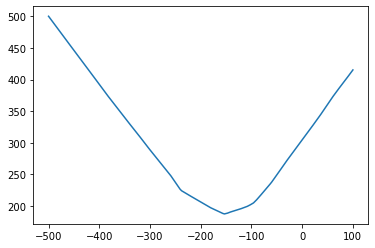

In [74]:
plt.plot(x,z)

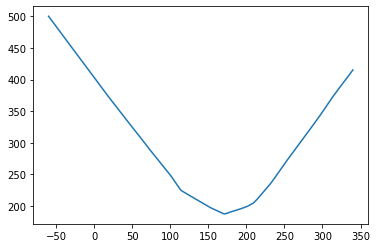

In [75]:
plt.plot(y,z)

Como se puede observar por las gráficas anteriores, se está obteniendo un cono con vértice muy cercano a $(-200,140,100)$, lo cual es una muy buena aproximación al cono

$$(x+200)^{2}+(y-140)^{2}=(z-100)^{2}$$